In [ ]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [ ]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))
print('')
cols=list(df.columns)
continous=list(set(df._get_numeric_data().columns)-{'Duration','Age'})
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)
# Duration and Age are categorical ( done in EDA part [Ayush_Project.ipynb] )
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

The dataset has 63326 Rows and 11 Columns

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Commision (in value)', 'Net Sales']
Categorical Variables :  ['Agency Type', 'Destination', 'Agency', 'Gender', 'Claim', 'Product Name', 'Age', 'Duration', 'Distribution Channel']


In [ ]:
a=list(df_['Destination'].unique())
aa=list(df_['Agency'].unique())

In [ ]:
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
print("Now the dataset  has {} Rows and {} Columns".format(df_.shape[0],df_.shape[1]))
print("%d records deleted from the dataset"%(df.shape[0]-df_.shape[0]))
df_=df_.reset_index().drop(columns='index')
df1=df_.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [ ]:
b=list(df_['Destination'].unique())
bb=list(df_['Agency'].unique())

In [ ]:
new=[]
for i in a :
  if(i not in list(b)):
    print(i)
    new.append(i)
for i in aa:
  if(i not in list(bb)):
    print(i)
    new.append(i)

KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
TIBET
JWT


In [ ]:
df.loc[df['Destination'].isin(new) ]#| df['Agency'].isin(new)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.1,NaN,118
56265,EPX,Travel Agency,Offline,2 way Comprehensive Plan,No,29,TIBET,24.0,0.0,NaN,118


In [ ]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [ ]:
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{1: 'Travel Agency', 0: 'Airlines'}
{78: 'MALAYSIA', 4: 'AUSTRALIA', 61: 'ITALY', 138: 'UNITED STATES', 128: 'THAILAND', 95: 'NORWAY', 143: 'VIET NAM', 32: 'DENMARK', 117: 'SINGAPORE', 63: 'JAPAN', 137: 'UNITED KINGDOM', 57: 'INDONESIA', 56: 'INDIA', 26: 'CHINA', 41: 'FRANCE', 125: 'TAIWAN, PROVINCE OF CHINA', 101: 'PHILIPPINES', 87: 'MYANMAR', 53: 'HONG KONG', 67: 'KOREA, REPUBLIC OF', 136: 'UNITED ARAB EMIRATES', 88: 'NAMIBIA', 92: 'NEW ZEALAND', 28: 'COSTA RICA', 19: 'BRUNEI DARUSSALAM', 102: 'POLAND', 121: 'SPAIN', 31: 'CZECH REPUBLIC', 44: 'GERMANY', 122: 'SRI LANKA', 21: 'CAMBODIA', 5: 'AUSTRIA', 120: 'SOUTH AFRICA', 127: 'TANZANIA, UNITED REPUBLIC OF', 70: "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 89: 'NEPAL', 90: 'NETHERLANDS', 76: 'MACAO', 29: 'CROATIA', 40: 'FINLAND', 23: 'CANADA', 130: 'TUNISIA', 109: 'RUSSIAN FEDERATION', 46: 'GREECE', 11: 'BELGIUM', 59: 'IRELAND', 124: 'SWITZERLAND', 25: 'CHILE', 60: 'ISRAEL', 8: 'BANGLADESH', 55: 'ICELAND', 103: 'PORTUGAL', 108: 'ROMANIA', 66: 

In [ ]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

0
One Hot Encoded dataset  has 62342 Rows and 199 Columns


In [ ]:
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [ ]:
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")

In [ ]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# **With Gender Column**

## LABEL ENCODING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(le_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


### **Decision Tree**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15112   245]
 [  218    11]]
Accuracy of Model      :  0.9702938534582317
Precision of Model     :  0.04296875
Recall of Model        :  0.048034934497816595
F1 Score of Model      :  0.04536082474226804
ROC_AUC score of Model :  0.5160406488599001


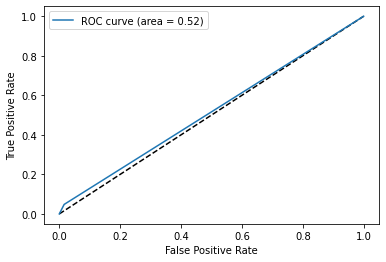

In [ ]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15355     2]
 [  229     0]]
Accuracy of Model      :  0.9851790068009753
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.49993488311519174


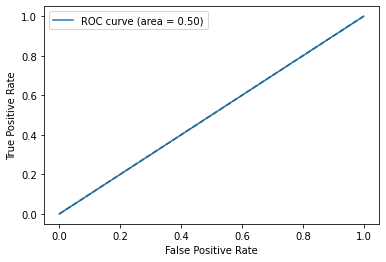

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15321    36]
 [  228     1]]
Accuracy of Model      :  0.9830617220582574
Precision of Model     :  0.02702702702702703
Recall of Model        :  0.004366812227074236
F1 Score of Model      :  0.0075187969924812035
ROC_AUC score of Model :  0.5010113021869889


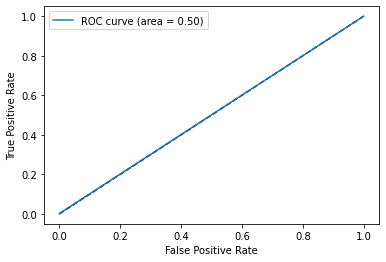

In [ ]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( Lable Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[15067   290]
 [  207    22]]
Accuracy of Model      :  0.9681124085717951
Precision of Model     :  0.07051282051282051
Recall of Model        :  0.09606986899563319
F1 Score of Model      :  0.08133086876155268
ROC_AUC score of Model :  0.5385929862006231


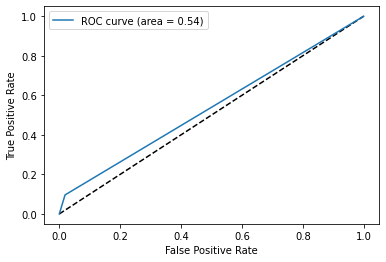

In [ ]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 100,200,1000,2000 ],
   'class_weight' : ['balanced'],
   'criterion' :['entropy','gini'], 
   'max_depth' : [ 100,500],
   'min_samples_split': [2],
   'max_features' : [5,8,10]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=2, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12844  2513]
 [   85   144]]
Accuracy of Model      :  0.8333119466187604
Precision of Model     :  0.054196462175385776
Recall of Model        :  0.62882096069869
F1 Score of Model      :  0.0997920997920998
ROC_AUC score of Model :  0.732591114587803


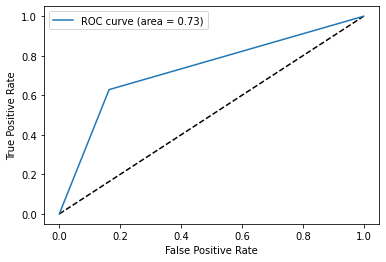

In [ ]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
               'multi_class':['multinomial','auto'],
               'solver':['saga','newton-cg','liblinear'],
            'penalty':['l1', 'elasticnet','l2'],
            'C':[0.2,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13161  2196]
 [   85   144]]
Accuracy of Model      :  0.8536507121775953
Precision of Model     :  0.06153846153846154
Recall of Model        :  0.62882096069869
F1 Score of Model      :  0.11210587777345271
ROC_AUC score of Model :  0.7429121408299076


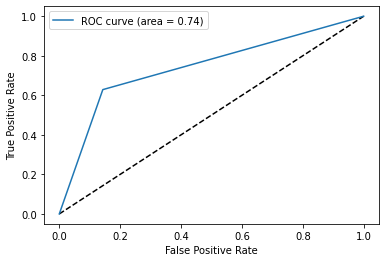

In [ ]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

## ONE HOT ENCODING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15117   240]
 [  212    17]]
Accuracy of Model      :  0.9709996150391377
Precision of Model     :  0.06614785992217899
Recall of Model        :  0.07423580786026202
F1 Score of Model      :  0.06995884773662553
ROC_AUC score of Model :  0.5293038777531434


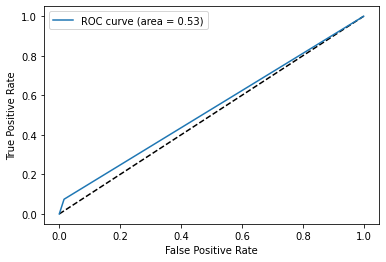

In [ ]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


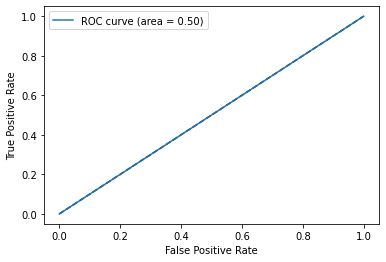

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15315    42]
 [  228     1]]
Accuracy of Model      :  0.982676761195945
Precision of Model     :  0.023255813953488372
Recall of Model        :  0.004366812227074236
F1 Score of Model      :  0.007352941176470587
ROC_AUC score of Model :  0.5008159515325642


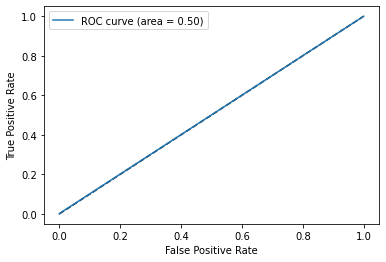

In [ ]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( One Hot Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=60, max_features=20, max_leaf_nodes=800,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[13217  2140]
 [  112   117]]
Accuracy of Model      :  0.8555113563454382
Precision of Model     :  0.05183872396987151
Recall of Model        :  0.5109170305676856
F1 Score of Model      :  0.09412711182622686
ROC_AUC score of Model :  0.6857834485390358


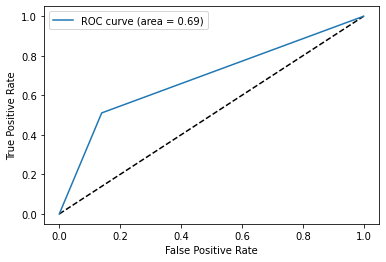

In [ ]:
param_grid = {
   'max_leaf_nodes': [ 800 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 20,50,60],
   'min_samples_split': [5,2,6],
   'max_features' : [20]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix       : 
 [[12350  3007]
 [   96   133]]
Accuracy of Model      :  0.8009110740408059
Precision of Model     :  0.04235668789808917
Recall of Model        :  0.5807860262008734
F1 Score of Model      :  0.07895517957850993
ROC_AUC score of Model :  0.6924897767912617


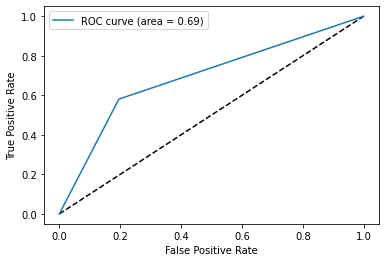

In [ ]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
            'max_iter':[40,100],
               'multi_class':['auto'],
               'solver':['saga','newton-cg','sag'],
            'penalty':['l1', 'elasticnet','l2'],
            'C':[0.2,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13195  2162]
 [   86   143]]
Accuracy of Model      :  0.8557679969203131
Precision of Model     :  0.062039045553145336
Recall of Model        :  0.6244541484716157
F1 Score of Model      :  0.1128650355169692
ROC_AUC score of Model :  0.7418357217581104


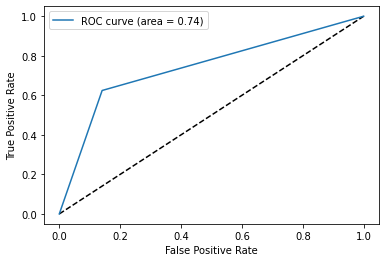

In [ ]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

# **Without Gender Column (Dropping the Column)**

In [ ]:
df_=df_.drop(columns='Gender')
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 10 Columns
One Hot Encoded dataset  has 62342 Rows and 196 Columns


In [ ]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

## LABEL ENCODING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(le_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15121   236]
 [  214    15]]
Accuracy of Model      :  0.9711279353265752
Precision of Model     :  0.05976095617529881
Recall of Model        :  0.06550218340611354
F1 Score of Model      :  0.06250000000000001
ROC_AUC score of Model :  0.5250672992956855


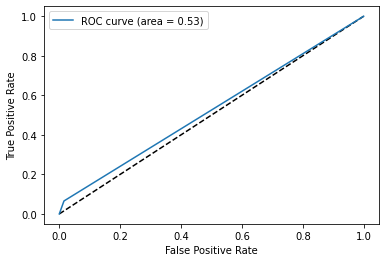

In [ ]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15356     1]
 [  229     0]]
Accuracy of Model      :  0.9852431669446939
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.49996744155759587


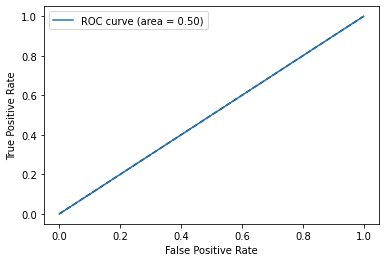

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15311    46]
 [  227     2]]
Accuracy of Model      :  0.9824842807647889
Precision of Model     :  0.041666666666666664
Recall of Model        :  0.008733624454148471
F1 Score of Model      :  0.014440433212996389
ROC_AUC score of Model :  0.5028691238764849


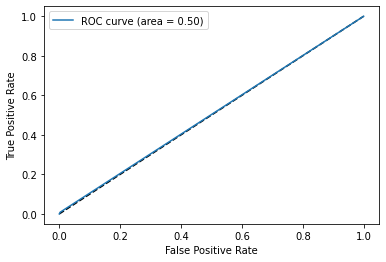

In [ ]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( Lable Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[15082   275]
 [  215    14]]
Accuracy of Model      :  0.9685615295778263
Precision of Model     :  0.04844290657439446
Recall of Model        :  0.0611353711790393
F1 Score of Model      :  0.05405405405405405
ROC_AUC score of Model :  0.5216141139283879


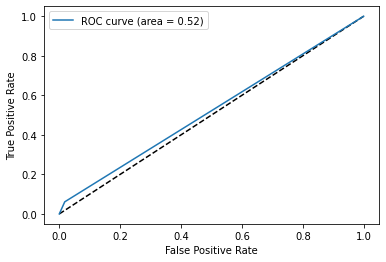

In [ ]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 100,200,1000,2000 ],
   'class_weight' : ['balanced'],
   'criterion' :['entropy','gini'], 
   'max_depth' : [ 100,500],
   'min_samples_split': [2],
   'max_features' : [5,8,10]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='none', random_state=2, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12809  2548]
 [   84   145]]
Accuracy of Model      :  0.8311305017323238
Precision of Model     :  0.05384329743780171
Recall of Model        :  0.6331877729257642
F1 Score of Model      :  0.09924709103353867
ROC_AUC score of Model :  0.7336349752171961


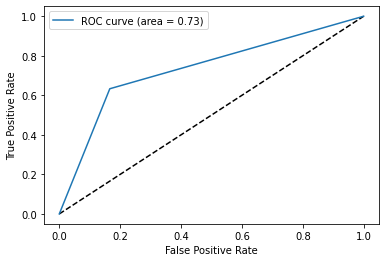

In [ ]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
            'multi_class':['multinomial','auto'],
            'solver':['saga','newton-cg','liblinear'],
            'penalty':['l1', 'elasticnet','none'],
            'C':[0.2,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13050  2307]
 [   79   150]]
Accuracy of Model      :  0.8469138970871295
Precision of Model     :  0.06105006105006105
Recall of Model        :  0.6550218340611353
F1 Score of Model      :  0.11169024571854058
ROC_AUC score of Model :  0.7523985904042735


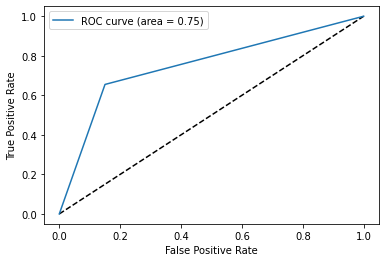

In [ ]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

## ONE HOT ENCODING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15128   229]
 [  216    13]]
Accuracy of Model      :  0.9714487360451688
Precision of Model     :  0.05371900826446281
Recall of Model        :  0.056768558951965066
F1 Score of Model      :  0.055201698513800426
ROC_AUC score of Model :  0.5209283961654401


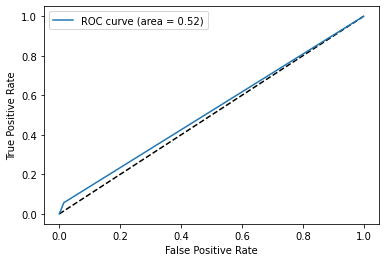

In [ ]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


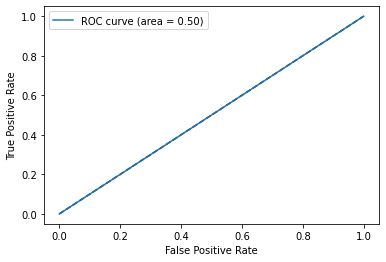

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15308    49]
 [  228     1]]
Accuracy of Model      :  0.982227640189914
Precision of Model     :  0.02
Recall of Model        :  0.004366812227074236
F1 Score of Model      :  0.007168458781362006
ROC_AUC score of Model :  0.5005880424357354


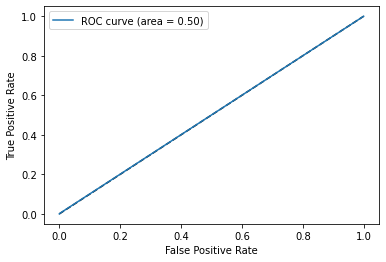

In [ ]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( One Hot Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=60, max_features=20, max_leaf_nodes=800,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[12887  2470]
 [   88   141]]
Accuracy of Model      :  0.8358783523675093
Precision of Model     :  0.05400229797012639
Recall of Model        :  0.6157205240174672
F1 Score of Model      :  0.09929577464788733
ROC_AUC score of Model :  0.7274409092705686


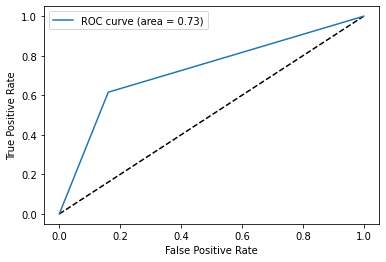

In [ ]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 800 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 20,50,60],
   'min_samples_split': [5,2,6],
   'max_features' : [20]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=4, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix       : 
 [[12315  3042]
 [  113   116]]
Accuracy of Model      :  0.7975747465674323
Precision of Model     :  0.03673210892970234
Recall of Model        :  0.5065502183406113
F1 Score of Model      :  0.0684971951579569
ROC_AUC score of Model :  0.6542323273769866


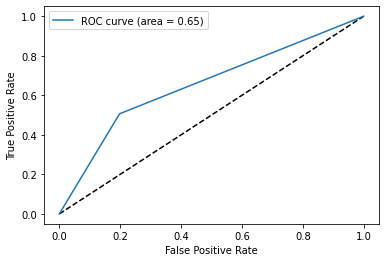

In [ ]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
            'max_iter':[100,60],
               'multi_class':['auto'],
               'solver':['saga','newton-cg','liblinear'],
            'penalty':['l1', 'elasticnet','l2'],
            'C':[0.2,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13177  2180]
 [   86   143]]
Accuracy of Model      :  0.8546131143333761
Precision of Model     :  0.06155832974601808
Recall of Model        :  0.6244541484716157
F1 Score of Model      :  0.1120689655172414
ROC_AUC score of Model :  0.7412496697948363


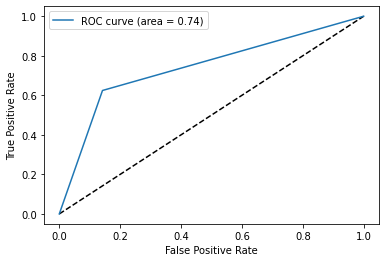

In [ ]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 20, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)